In [ ]:
### On the Problem of Predicting Whether a Candidate is Ready To Leave their Job

## Introduction

In [ ]:
# Human resource departments at companies and institutions face the usual challenge of sorting 
# hundreds to thousands of applications to identify those candidates who are most likely to leave
# their present employment. Although a decision to leave depends strongly on the offer received,
# experience determines that candidates have various levels of predisposition based only on
# their current circumstances. Ranking candidates according to that predisposition allows HR departments 
# to focus their resources on those candidates that are most likely to change jobs.
#
# To start exploring this problem, Team 4 selected a dataset from Kaggle titled "HR Analytics: Job Change 
# of Data Scientists." https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists.
# This dataset contains information about a large pool of potential candidates at a hypothetical company. 
# That information includes their gender, relevant experience, education level, current company type 
# and size, city index of development, years since been hired for the last job, etc., and the
# expressed desire to either leave their current position or likely to stay in it.
# 
# The purpose of our project is to do Exploratory Data Analysis to examine the database, and then 
# determine what features appear as better determinant of the outcome for each candidate in the
# database: likely to leave or likely to stay.  Full statistical analysis to generate a 
# model capable of predicting the binary outcome from mostly categorical variables, is outside 
# the project scope at this stage.

# The questions to investigate are:
# Which gender is most probable to leave their current job?
# What type of company will employees most likely leave?
# Does more training time lead to candidates more likly to leave their current job?
# Are people likely to change their jobs when they have experience that is more relevant to the position?

In [ ]:
# Data Features

# The features of the data are as follows:
#
# enrollee_id : Unique ID for candidate - categorical 
# city: City code - discrete
# city_development_index : Development index of the city (scaled) - continuous 
# gender: Gender of candidate - categorical
# relevant_experience: Relevant experience of candidate - categorical
# enrolled_university: Type of University course enrolled if any - categorical
# education_level: Education level of candidate - categorical
# major_discipline: Education major discipline of candidate - categorical
# experience: Candidate total experience in years - discrete
# company_size: No of employees in current employer's company - discrete
# company_type : Type of current employer - categorical
# lastnewjob: Difference in years between previous job and current job -4 discrete
# training_hours: training hours completed - continuous
# target: 0 – Not looking for job change, 1 – Looking for a job change - binary

In [ ]:
## Prepare and Wrangle data with Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the target data for the test set, provided as a numpy array
target =  np.load('/Users/anaortez-rivera/DS-201-Project-1/jobchange_test_target_values.npy')

In [3]:
# load the test set, provided as a CSV file
testdata = pd.read_csv('/Users/anaortez-rivera/DS-201-Project-1/aug_test.csv',sep=',')

In [4]:
# load the target data for the test set, provided as a numpy array
target =  np.load('jobchange_test_target_values.npy')

In [5]:
len(target)

2129

In [6]:
len(testdata)

2129

In [7]:
# correct typo in 'relevent'
testdata['relevent_experience'] = testdata['relevent_experience'].str.replace('relevent', 'relevant')
testdata.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
testdata.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [8]:
testdata[0:5]  # test data without the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [9]:
target[:5]   #   target array

array([1., 0., 1., 0., 1.])

In [10]:
testdata['target'] = target    #   add the column with targets to testdata 

In [11]:
testdata[:5]  #  test data with the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [12]:
# load the training set, provided as a CSV file
training = pd.read_csv('aug_train.csv',sep=',')

In [13]:
len(training)

19158

In [14]:
# correct typo in 'relevent'
training['relevent_experience'] = training['relevent_experience'].str.replace('relevent', 'relevant')
training.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [15]:
# save the test set with target column included
testdata.to_csv ('aug_test1.csv', sep = ',')

In [16]:
# Checking to see how many null values
training.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
# Dropping all the nulls 
new_training = training.dropna()

In [18]:
# viewing new dataset
new_training.shape

(8955, 14)

In [19]:
# checking that there are no more nulls
new_training.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [20]:
# Viewing head of new data
new_training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [21]:
## Use EDA principles and the Matplotlib / Seaborn packages to visualize the data

In [22]:
# Importing packages
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
new_training.value_counts('target')

target
0.0    7472
1.0    1483
dtype: int64

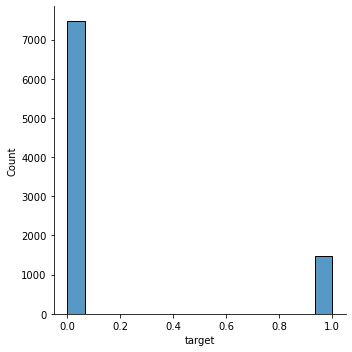

In [24]:
# Counting the amount of target data, showing its imbalanced
sns.displot(new_training['target'])
plt.show()

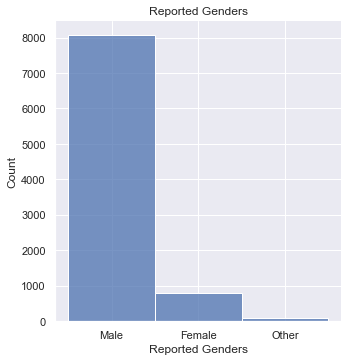

In [25]:
# Graph of the number of genders reported in dataset
sns.set_theme(style="darkgrid")
sns.displot(new_training['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders')
plt.show()

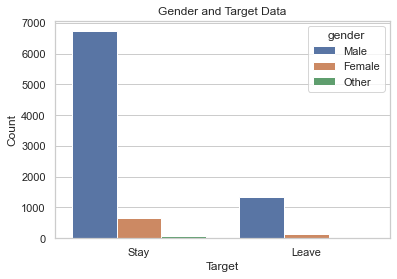

In [26]:
# Graph of counting the number of people who are willing to leave/stay based on gender
sns.set_theme(style="whitegrid")
sns.countplot(x='target',hue='gender',data=new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Gender and Target Data')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

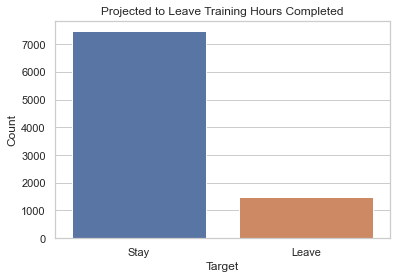

In [27]:
# Bargraph of the number of people who are willing to leave/stay in dataset
sns.countplot(x='target', data = new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Projected to Leave Training Hours Completed')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

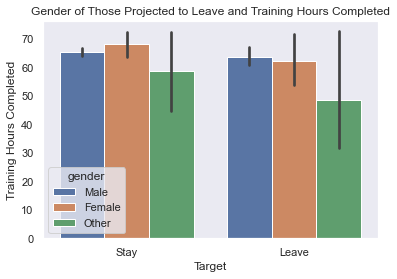

In [28]:
# Barplot of the genders of people who are willing to leave/stay and the training hours completed
sns.set_theme(style="dark")
sns.barplot(x="target", y="training_hours", hue="gender", data=new_training)
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.xlabel('Target')
plt.ylabel('Training Hours Completed')
plt.title('Gender of Those Projected to Leave and Training Hours Completed')
plt.show()

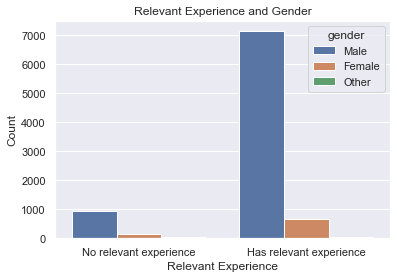

In [29]:
# Bargraph counting those with relevant experience based on gender
sns.set_theme(style="darkgrid")
sns.countplot(x='relevant_experience', hue = 'gender',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience and Gender')
plt.show()

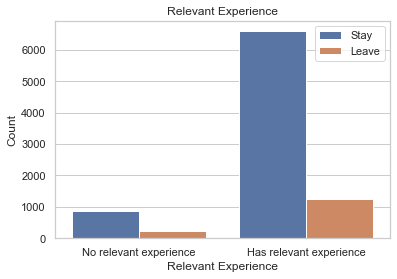

In [30]:
# Bargraph counting those who have relevant experience based on likelihood of leaving/staying
sns.set_theme(style="whitegrid")
sns.countplot(x ='relevant_experience', hue ='target',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience')
plt.legend(('Stay','Leave'))
plt.show()

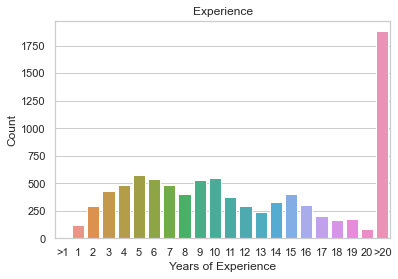

In [31]:
# Graph on how many different years of experiences employeees have
# re-arrange
experience_order = ['>1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
sns.countplot(x='experience',data=new_training, order = experience_order)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Experience')
plt.show()

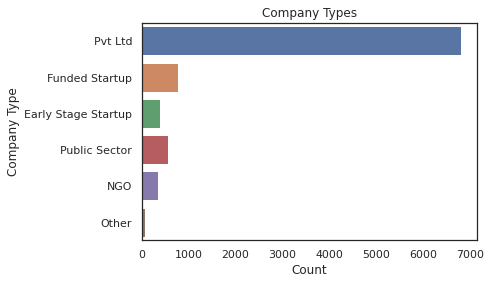

In [ ]:
# Graph counting the types of companies in dataset
sns.set_theme(style="white")
sns.countplot(y='company_type',data=new_training)
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Types')
plt.show()

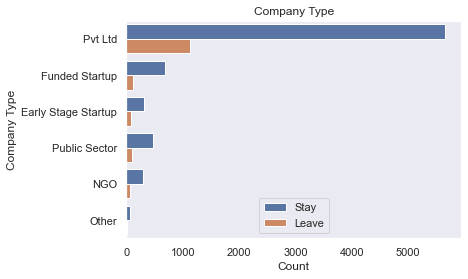

In [32]:
# Graph counting the types of companies and how many employees are/are not predicted to leave
sns.set_theme(style="dark")
sns.countplot(y='company_type',hue= 'target', data=new_training)
plt.legend(('Stay','Leave'), loc='lower center')
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Type')
plt.show()

Median of the original training set:  47.0
Bootstrap median (red line):  47.0
95% Confidence interval (yellow lines): [44.  50.5]


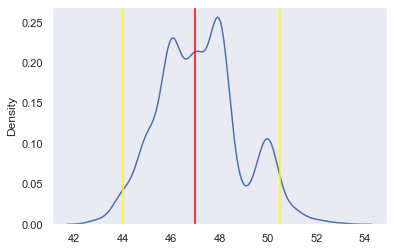

In [33]:
# Simulate a nonparametric inference of the Median for a quantitative variable
# (bootstrapping inference of median of 'training_hours' array)

print ("Median of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []
for i in range (1000):
  boot_sample = np.random.choice(training['training_hours'], 1000)
  median_boot_samples.append(np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("Bootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

conf_int = np.percentile(median_boot_samples, [2.5, 97.5])     #confidence interval, central 95%
print ("95% Confidence interval (yellow lines):", conf_int)

sns.kdeplot (median_boot_samples)      # plot the distribution, indicate median, conf. int.
plt.axvline (bootstrap_median, color = 'red')
for ends in conf_int:
  plt.axvline (ends, color = 'yellow')


In [34]:
## implement bootstrapping to infer the median of 'training_hours', using sklearn resample
from sklearn.utils import resample

print ("Median of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []

for i in range (100):
  boot_sample = resample(training['training_hours'], replace=True, random_state=1)
  median_boot_samples.append (np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("Bootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

Median of the original training set:  47.0
Bootstrap median (red line):  47.0


In [35]:
# Calculate probability of leaving for each category,  defined as P = Leave/(Leave+Stay)


In [36]:
counts = new_training.groupby(['gender','target']).size().reset_index(name='counts')
counts


,gender,target,counts
0,Female,0.0,673
1,Female,1.0,131
2,Male,0.0,6733
3,Male,1.0,1340
4,Other,0.0,66
5,Other,1.0,12


In [37]:
Pfem = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pfem

0.16293532338308458

In [38]:
Pmal = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pmal

0.16598538337668772

In [39]:
Poth = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
Poth

0.15384615384615385

In [40]:
counts = new_training.groupby(['education_level','target']).size().reset_index(name='counts')
counts

,education_level,target,counts
0,Graduate,0.0,5160
1,Graduate,1.0,1092
2,Masters,0.0,2092
3,Masters,1.0,357
4,Phd,0.0,220
5,Phd,1.0,34


In [41]:
Pgra = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmst = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphd = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print (Pgra, Pmst, Pphd)

0.1746641074856046 0.14577378521845652 0.13385826771653545


In [42]:
counts = new_training.groupby(['education_level','gender','target']).size().reset_index(name='counts')
counts

,education_level,gender,target,counts
0,Graduate,Female,0.0,441
1,Graduate,Female,1.0,85
2,Graduate,Male,0.0,4669
3,Graduate,Male,1.0,995
4,Graduate,Other,0.0,50
5,Graduate,Other,1.0,12
6,Masters,Female,0.0,194
7,Masters,Female,1.0,42
8,Masters,Male,0.0,1882
9,Masters,Male,1.0,315


In [43]:
Pgraf = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmstf = counts.loc[7,'counts'] / (counts.loc[6,'counts'] + counts.loc[3,'counts'])
Pphdf = counts.loc[12,'counts'] / (counts.loc[11,'counts'] + counts.loc[5,'counts'])
Pgram = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[1,'counts'])
Pmstm = counts.loc[9,'counts'] / (counts.loc[8,'counts'] + counts.loc[3,'counts'])
Pphdm = counts.loc[14,'counts'] / (counts.loc[13,'counts'] + counts.loc[5,'counts'])
Pgrao = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[1,'counts'])
Pmsto = 0. / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphdo = 0. / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print (Pgraf, Pmstf, Pphdf)
print (Pgram, Pmstm, Pphdm)
print (Pgrao, Pmsto, Pphdo)

0.16159695817490494 0.03532380151387721 0.08
0.20929743374000842 0.10948905109489052 0.15463917525773196
0.08888888888888889 0.0 0.0


In [44]:
new_training.drop('enrollee_id', axis=1).groupby('major_discipline').mean()

,city_development_index,training_hours,target
major_discipline,,,
Arts,0.907961,56.224806,0.069767
Business Degree,0.878659,70.482353,0.123529
Humanities,0.900392,66.124339,0.105820
No Major,0.863777,59.687500,0.133929
Other,0.860650,61.728814,0.107345
STEM,0.839554,65.202779,0.172612


In [45]:
new_training.drop('enrollee_id', axis=1).groupby('company_type').mean()

,city_development_index,training_hours,target
company_type,,,
Early Stage Startup,0.807151,69.441558,0.202597
Funded Startup,0.853381,67.178571,0.137755
NGO,0.856022,63.117978,0.154494
Other,0.870667,69.305556,0.208333
Public Sector,0.871012,59.132979,0.166667
Pvt Ltd,0.842602,65.135708,0.166765


In [46]:
new_training.drop('enrollee_id', axis=1).groupby('relevant_experience').mean()

,city_development_index,training_hours,target
relevant_experience,,,
Has relevant experience,0.844350,65.472042,0.160489
No relevant experience,0.846132,62.250906,0.201993


In [47]:
new_training.experience = pd.to_numeric(new_training.experience, errors='coerce')
dfnew = new_training.drop('enrollee_id', axis=1).groupby('experience', as_index=False)['target'].mean()
dfnew

/Users/anaortez-rivera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,experience,target
0,1.0,0.429752
1,2.0,0.245791
2,3.0,0.292056
3,4.0,0.231250
4,5.0,0.246957
5,6.0,0.218692
6,7.0,0.226804
7,8.0,0.193467
8,9.0,0.178236
9,10.0,0.156080


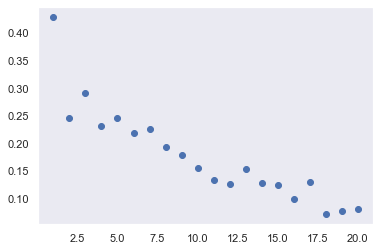

In [48]:
x, y = dfnew.experience, dfnew.target

plt.scatter(x, y, marker='o') ;

In [49]:
ins=[1999,2004,2009,2014]
labels=['2000-2004','2005-2009','2010-2014']
df['Year']=pd.cut(df.year,bins,labels=labels)
print(df.groupby('Year',as_index=False).agg({'Product':'first','Total sale':'mean'}))

NameError: name 'df' is not defined

In [ ]:
new_training['city_development_index'].describe()

In [ ]:
bins = [0.4,.82,.919,.92,.96]
labels = ['.40-.82', '.821-.91','.911-.930','.931-.960']
new_training['City_class'] = pd.cut(new_training.city_development_index, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('City_class', as_index=False).mean()

In [ ]:
new_training['experience'].describe()

In [ ]:
bins = [0,5,9,12,16,20]
labels = ['0-5', '5.1-9','9.1-12','12.1-16', '16.1-20']
new_training['Training_hr'] = pd.cut(new_training.training_hours, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('Training_hr', as_index=False).mean()

In [ ]:
new_training['company_type'].describe()

In [ ]:
new_training['company_size'].describe()

In [ ]:
new_training['last_new_job'].describe()

In [ ]:
new_training['city'].describe()

In [ ]:
# implementing sklearn LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# drop enrollee_id, city
new_training2 = new_training.drop(['enrollee_id','city'], axis=1) 
new_training2.head()

In [ ]:
y = new_training2.target.copy()
X = new_training2.drop(['target'], axis=1)

In [ ]:
model = LogisticRegression()
model.fit = (X, y)

In [ ]:
y_pred = pd.Series(model.predict(X))
z = pd.concat([y, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()